# HW5 
## CS6017
### Terra Tidwell
### u0938927


In [1]:
import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [16]:
# Code to scale images...

digits = load_digits()
X = scale( digits.data )
y = digits.target

n_samples, n_features = X.shape
n_digits = len( np.unique(digits.target) )

print( "n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features) )

n_digits: 10, n_samples 1797, n_features 64


In [17]:
# This is what one digit (the "zero") looks like:

print( "===\nThe raw data" )
print( digits.images[0] )

print( "===\nThe scaled data" )
print( X[0] )

print( "===\nThe digit" )
print( digits.target[0] )

===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

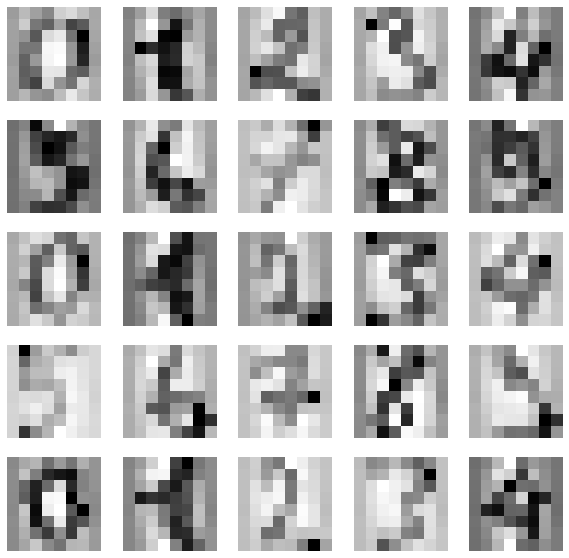

In [18]:
# Display the first 25 images...

plt.figure( figsize=(10, 10) )
 
for ii in np.arange( 25 ):
    plt.subplot( 5, 5, ii+1 )
    plt.imshow( np.reshape( X[ii,:], (8,8) ), cmap='Greys', interpolation='nearest' )
    plt.axis( 'off' )

plt.show()

# Part 1

In [19]:
#Testing task 1.1
#1

XTrain, XTest, yTrain, yTest = train_test_split( X, y, random_state=1, test_size=0.8 ) 

#2 
classifier = svm.SVC(kernel = 'rbf', C=5, gamma = 'auto')

classifier.fit(XTrain, yTrain)
prediction = classifier.predict(XTest)

print ('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = prediction))

#3 
print("Confusion Matrix: \n", metrics.confusion_matrix(y_true= yTest, y_pred = prediction))


Accuracy =  0.952712100139082
Confusion Matrix: 
 [[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 140   0   0  12   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   0   1   0   1   0   1 126   0]
 [  0   2   0   2   0   3   1   2   2 140]]


### It seems like the most common mistakes the classifier makes is between 0s and 8s.

Misclassified digits Actual(A), Predicted(P): 



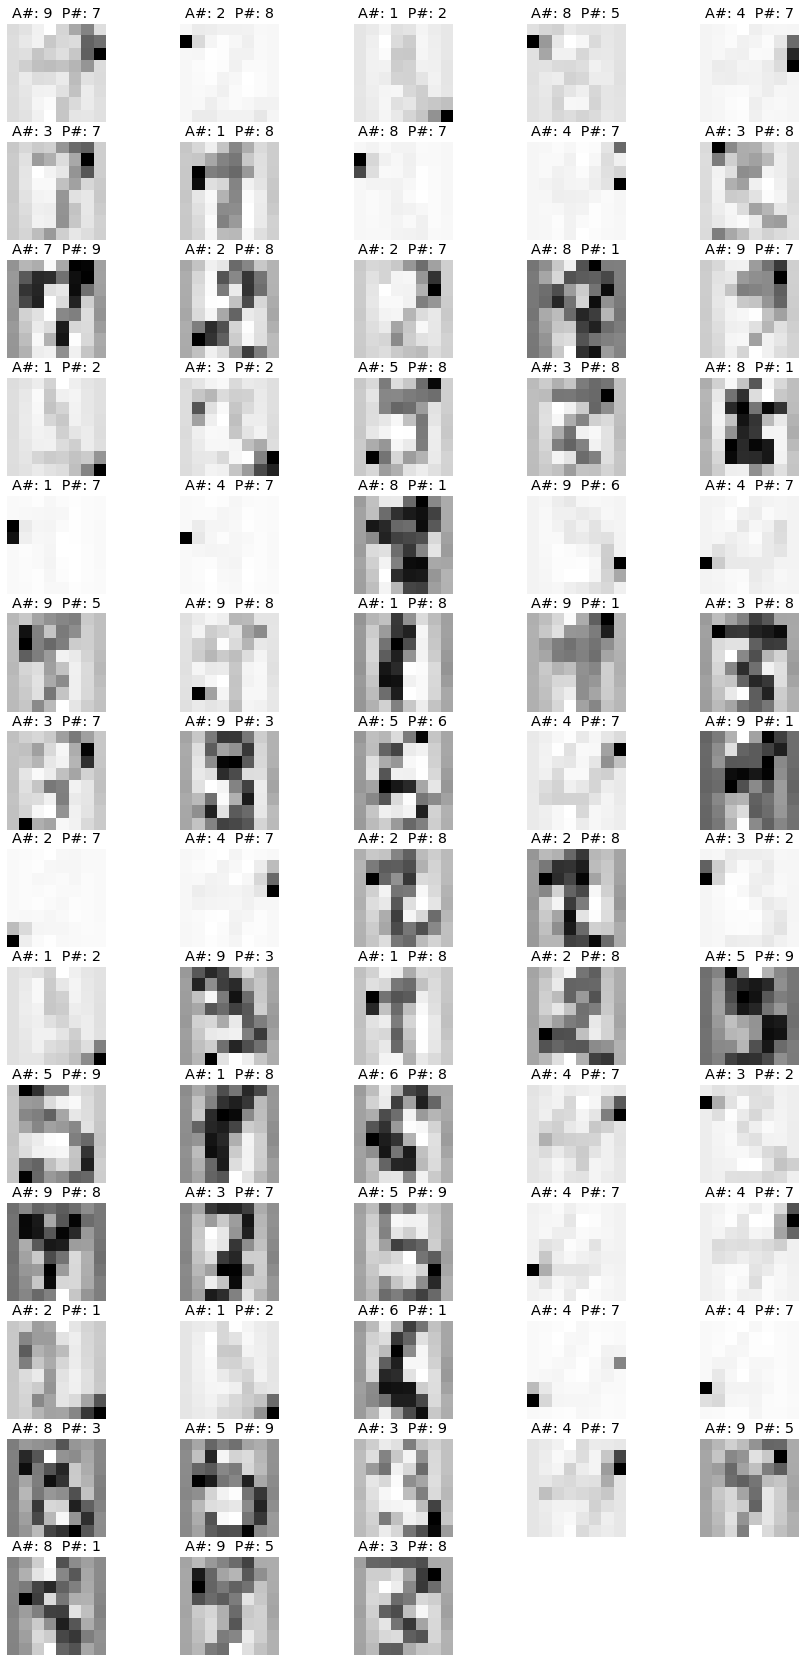

In [20]:
#4
#displaying only misclassified digits 

count = 0
for i in range(len(prediction)):
    if(prediction[i] != yTest[i]):
        count += 1

print("Misclassified digits Actual(A), Predicted(P): \n") 

j = 0
plt.figure(figsize=(15, 30))

for i in range(len(prediction)):
    if(prediction[i] != yTest[i]):
        j += 1
        plt.subplot(int((count/5)+1), 5, j)
        plt.imshow(np.reshape(XTest[i], (8,8)), cmap='Greys')
        plt.title(label='A#: ' + str(yTest[i]) + "  P#: "+ str(prediction[i]))
        plt.axis('off')
plt.show()

In [21]:
#5 
from sklearn.svm import SVC


for c_val in np.arange(.5, 5.1, .1):
    svc = svm.SVC(kernel='rbf', C=c_val)
    scores = cross_val_score(svc, X, y, cv=5)
    
    print("C-Val: ", (str(round(c_val, 1))), "as C with results: ", np.mean(scores))

for c_val in np.arange(10, 51, 20):
    svc = svm.SVC(kernel='rbf', C=c_val)
    scores = cross_val_score(svc, X, y, cv=5)
    print("C-Val: ", c_val, "as C with results: ", np.mean(scores))

C-Val:  0.5 as C with results:  0.936564531104921
C-Val:  0.6 as C with results:  0.9382342927886104
C-Val:  0.7 as C with results:  0.9410136180748994
C-Val:  0.8 as C with results:  0.9449102445063448
C-Val:  0.9 as C with results:  0.9465784586815227
C-Val:  1.0 as C with results:  0.9493624264933457
C-Val:  1.1 as C with results:  0.9499179820489012
C-Val:  1.2 as C with results:  0.9504735376044569
C-Val:  1.3 as C with results:  0.9510290931600123
C-Val:  1.4 as C with results:  0.9521417517796348
C-Val:  1.5 as C with results:  0.9532528628907458
C-Val:  1.6 as C with results:  0.9532528628907458
C-Val:  1.7 as C with results:  0.9538099659548127
C-Val:  1.8 as C with results:  0.9532528628907458
C-Val:  1.9 as C with results:  0.9538084184463014
C-Val:  2.0 as C with results:  0.954363974001857
C-Val:  2.1 as C with results:  0.954363974001857
C-Val:  2.2 as C with results:  0.954363974001857
C-Val:  2.3 as C with results:  0.954363974001857
C-Val:  2.4 as C with results:  0.95

### The best values of C seem to be 2.8 and 2.9 with an accuracy of 95.5. 

In [22]:
#6 
x_unscaled = digits.data
Xtrain, Xtest, yTrain, yTest = train_test_split(x_unscaled, y, random_state=1, test_size=0.8)


svc = svm.SVC(kernel='rbf', C=100, gamma='scale')

svc.fit(Xtrain,yTrain)
pred = svc.predict(Xtest)

print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = pred))

print(metrics.confusion_matrix(yTest, pred))     


Accuracy =  0.9756606397774688
[[129   0   0   0   1   0   0   0   0   0]
 [  0 144   0   0   0   0   0   0   5   0]
 [  0   0 141   0   0   0   0   0   1   0]
 [  0   0   0 140   0   1   0   2   3   1]
 [  0   0   0   0 152   0   0   0   0   0]
 [  0   0   0   0   0 143   1   0   0   3]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   0   0   0   0   0   0 128   1]
 [  0   1   0   4   0   1   0   0   3 143]]


### The algorithm seems to have performed better on unscaled, raw data which would make sense if that means having more data points and thus more opportunity to test and perfect the performance of the program.

# Task 1.2

In [23]:
#Using KNN 


XTrain, XTest, yTrain, yTest = train_test_split( X, y, random_state=1, test_size=0.8 ) 

svc = KNeighborsClassifier(n_neighbors = 10)
svc.fit(XTrain, yTrain)

prediction = svc.predict(XTest)
print("Accuracy: ", metrics.accuracy_score(yTest, prediction))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_true=yTest, y_pred=prediction))

Accuracy:  0.9123783031988874
Confusion Matrix: 
 [[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]


### This accuracy is less than the accuracy of using SVM

Misclassified digits Actual(A), Predicted(P): 



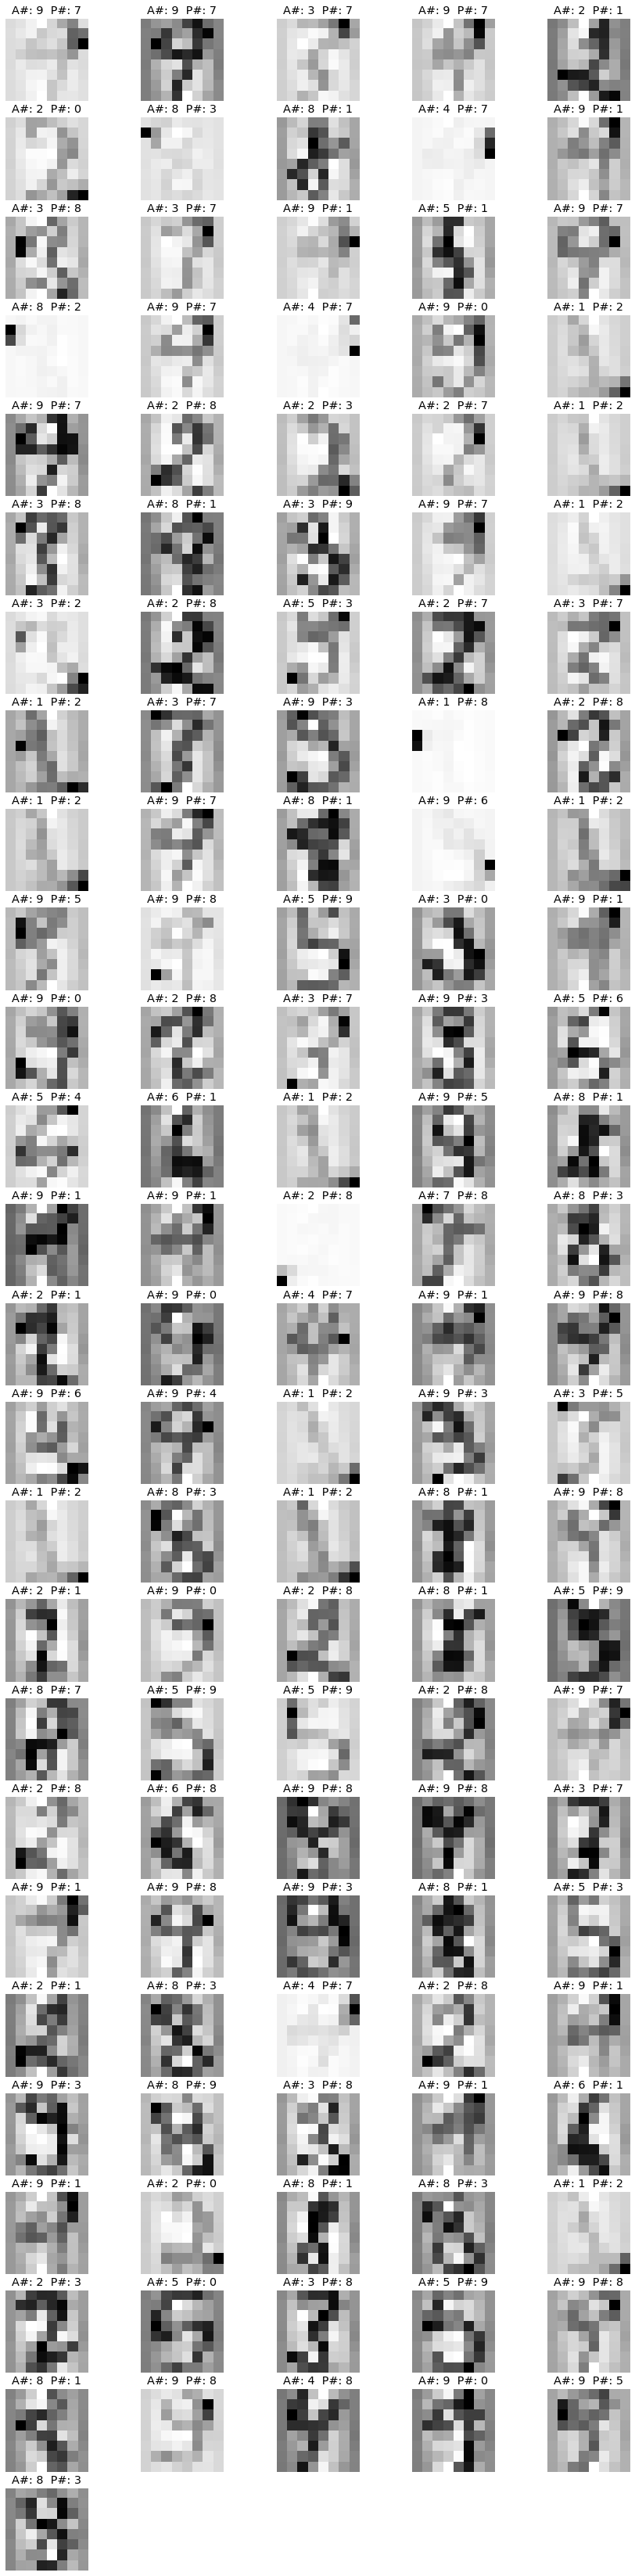

In [24]:
#2

count = 0
for i in range(len(prediction)):
    if(prediction[i] != yTest[i]):
        count += 1

print("Misclassified digits Actual(A), Predicted(P): \n") 

j = 0
plt.figure(figsize=(15, 60))

for i in range(len(prediction)):
    if(prediction[i] != yTest[i]):
        j += 1
        plt.subplot(int((count/5)+1), 5, j)
        plt.imshow(np.reshape(XTest[i], (8,8)), cmap='Greys')
        plt.title(label='A#: ' + str(yTest[i]) + "  P#: "+ str(prediction[i]))
        plt.axis('off')
plt.show()

[0.9432544103992573]
[0.9432544103992573, 0.8831646549056019]
[0.9432544103992573, 0.8831646549056019, 0.8436490250696378]
[0.9432544103992573, 0.8831646549056019, 0.8436490250696378, 0.787455896007428]
[0.9432544103992573, 0.8831646549056019, 0.8436490250696378, 0.787455896007428, 0.7273228102754565]


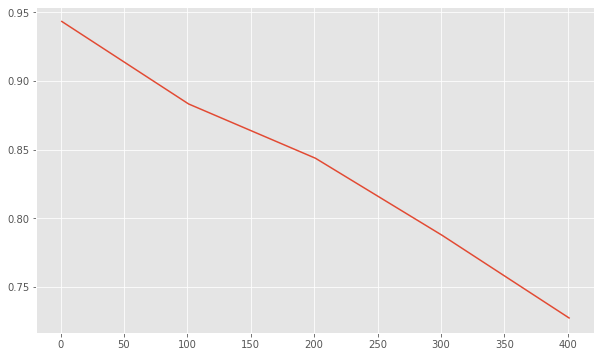

In [25]:
neighbors = np.arange(1, 500, 100)
s = []

for i in range(len(neighbors)):
    svc = KNeighborsClassifier(n_neighbors=int(neighbors[i]))
    scores = cross_val_score(estimator = svc, X = X, y = y, cv=5, scoring='accuracy')
    s.append(scores.mean())
    print(s)
plt.plot(neighbors, s)
plt.show()


In [26]:
x_unscaled = digits.data
Xtrain, Xtest, yTrain, yTest = train_test_split(x_unscaled, y, random_state=1, test_size=0.8)


svc = KNeighborsClassifier(n_neighbors=10)

svc.fit(Xtrain,yTrain)
pred = svc.predict(Xtest)

print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = pred))

print(metrics.confusion_matrix(yTest, pred))

Accuracy =  0.9381084840055632
[[130   0   0   0   0   0   0   0   0   0]
 [  0 146   0   1   1   1   0   0   0   0]
 [  2   3 128   0   0   0   0   2   7   0]
 [  0   0   0 135   0   2   0   6   3   1]
 [  0   0   0   0 150   0   0   2   0   0]
 [  0   0   0   3   1 139   1   0   0   3]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 140   0   0]
 [  0   6   2   4   0   1   0   1 117   2]
 [  2   8   0   6   0   3   0   9   4 120]]


### KNN does not perform as well as the SVM, but mistakes different images from the SVM as well. From the printed images, it seems like it couldn't predict 9's as clearly which must have something to do with the amount of data that KNN uses to interpret the images. When the data is unscaled, it does turn out more accurate but still not as accurate as using SVM.  For the value of K, the larger K is, the less accurate the prediction becomes which makes sense because if your neighbor is considered within a large area in realtion to the point of interest, then you are going to get a lot of innacurately classified data points.

# Part 2: Popularity of online news

In [2]:
# Task 2.1 

data= pd.read_csv("/Users/terratidwell/MSD2022/TerraTidwell/CS6017/OnlineNewsPopularity.csv")

X = data.drop([' shares', 'url', ' timedelta'], axis=1)
X = X.values

shares = data[' shares']

median = np.median(shares)
y = np.array([])
for i in shares:
    if i > median:
        y = np.append(y, 1)
    else:
        y = np.append(y, 0)
print(y)


[0. 0. 1. ... 1. 0. 0.]


In [57]:
#2.2 

shares.describe()

print("Min: ", np.min(shares))
print("Median: ", median)
print("Max: ", np.max(shares))

Min:  1
Median:  1400.0
Max:  843300


Neighbors:  1 0.624
Neighbors:  2 0.656
Neighbors:  3 0.624
Neighbors:  4 0.632
Neighbors:  5 0.712
Neighbors:  6 0.672
Neighbors:  7 0.68
Neighbors:  8 0.632
Neighbors:  9 0.704
Neighbors:  10 0.664


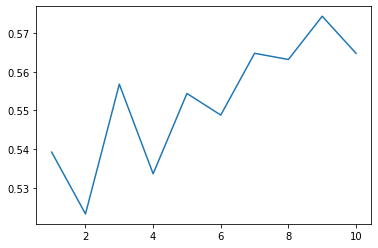

In [3]:
#2.3 

neighbors=[]
s=[]
smallSet_x = X[0:5000]
smallSet_y = y[0:5000]
X_train, X_test, y_train, y_test = train_test_split(smallSet_x, smallSet_y, random_state=1, test_size=0.75)

for i in range(1, 11):
    svc = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(estimator = svc, X = X_train, y = y_train, cv=10, scoring='accuracy')
    s.append(scores.mean())
    neighbors.append(i)
    print("Neighbors: ", i, max(scores))

plt.plot(neighbors, s)

plt.show()



### Interpretation of KNN findings: the testing seems to show that more niehgbors, at least up to 10, relates to better accuracy for the data.

C-value:  1 0.624
C-value:  6 0.648
C-value:  11 0.688
C-value:  16 0.664
C-value:  21 0.64
C-value:  26 0.64
C-value:  31 0.64
C-value:  36 0.648
C-value:  41 0.648
C-value:  46 0.648
C-value:  51 0.656
C-value:  56 0.656
C-value:  61 0.648
C-value:  66 0.656
C-value:  71 0.656
C-value:  76 0.656
C-value:  81 0.656
C-value:  86 0.648
C-value:  91 0.64
C-value:  96 0.64


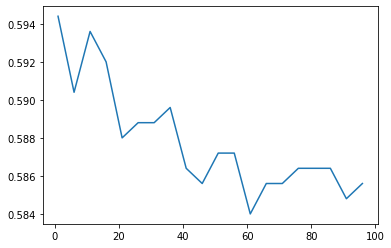

In [25]:
#2.4

smallSet_x = X[0:5000]
smallSet_y = y[0:5000]

a=[]
b=[]
X_train, X_test, y_train, y_test = train_test_split(smallSet_x, smallSet_y, random_state=1, test_size=0.75)

for i in range(1, 100, 5):
    svc = svm.SVC(kernel='rbf', gamma='auto', C=i)
    scores = cross_val_score(estimator = svc, X = X_train, y = y_train, cv=10, scoring='accuracy')
    a.append(scores.mean())
    b.append(i)
    print("C-value: ", i, max(scores))    

plt.plot(b, a)

plt.show()


Depth:  3 0.6427850655903128
Depth:  4 0.6508577194752775
Depth:  5 0.6478304742684158
Depth:  6 0.6528758829465187
Depth:  7 0.6508577194752775
Depth:  8 0.6458123107971746
Depth:  9 0.6347124117053481
Depth:  10 0.6266397578203835
Depth:  11 0.6246215943491423
Depth:  12 0.6236125126135217
Depth:  13 0.6195761856710393
Depth:  14 0.6195761856710393
Depth:  15 0.615539858728557
Depth:  16 0.6145307769929365
Depth:  17 0.6014127144298688
Depth:  18 0.6014127144298688
Depth:  19 0.6054490413723511
Depth:  20 0.5983854692230071
Depth:  21 0.6044399596367306
Depth:  22 0.6004036326942482
Depth:  23 0.5973763874873865
Depth:  24 0.6004036326942482
Depth:  25 0.6054490413723511
Depth:  26 0.5953582240161454
Depth:  27 0.5903128153380424
Depth:  28 0.6024217961654894
Depth:  29 0.6034308779011099
Depth:  30 0.5983854692230071
Depth:  31 0.6034308779011099
Depth:  32 0.6024217961654894
Depth:  33 0.5953582240161454
Depth:  34 0.5953582240161454
Depth:  35 0.6004036326942482
Depth:  36 0.60443

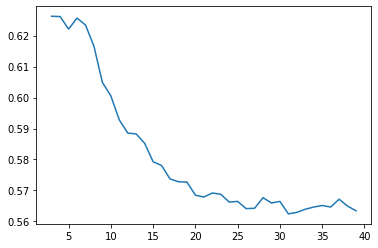

In [27]:
#2.5

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.75)
score = []
depth = []
for i in range(3, 40):
    decisionTree = tree.DecisionTreeClassifier(max_depth=i, min_samples_split=10)
    decisionTree = decisionTree.fit(X_train, y_train)
    scores = cross_val_score(estimator = decisionTree, X = X_train, y = y_train, cv=10, scoring='accuracy')
    score.append(scores.mean())
    depth.append(i)
    print("Depth: ", i, max(scores))   
    
plt.plot(depth, score)

plt.show()


### Depth in a tree of about 6 seems to bring the best accuracy, with the accuracy decreasing generally as the depth of the tree increases.

### 2.6 Describe your findings 
### According to the algorithms, the decision tree had the best performance on average. The parameters generally related to the accuracy with the models showing that as the parameter value increased, the accuracy decreased, except for in the case of KNN which has a positive coorelation with the accuracy. The different parameters included the number of neighbors, the cost of the SVM, or the depth of the tree.

### I feel like the Decision Tree model was the easiet to interpret, perhaps because the concept itself is pretty straight forward. The SVM made it difficult to get a good set of output data. 

### When we compare the accuracies of the model, we can interpret which model is best to use for our given data. Like mentioned, in this case the decision tree was the best performer and thus shows that for the desired result of predicting popularity based on number of shares, a decision tree would be the best model the showcase our findings with the data.